Langkah pengerjaan GC :
- EDA sebelum clustering: Scatterplot, Bar chart, Pie chart
- Feature Scaling dan PCA data numerik
- Pemodelan Clustering, misalkan dengan K-Means.
- Cek jumlah Cluster dengan Elbow method
- Cek jumlah Cluster dengan Silhouette Score
- Analisis Hasil dari cluster, berdasarkan data yang kalian gunakan.

# Usecase : Clustering

[Kaggle Dataset: Mall Customer](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# !pip install -q kaggle

In [ ]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 2.22MB/s]


In [ ]:
!unzip customer-segmentation-tutorial-in-python.zip -d dataset

Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: dataset/Mall_Customers.csv  


In [ ]:
df= pd.read_csv('/content/dataset/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Mengganti nama kolom agar mudah digunakan
df= df.rename(columns={'Annual Income (k$)': 'annual_income',
                       'Spending Score (1-100)': 'spending_score'})

#Menggati Female:1 dan Male:0
df['Gender'].replace(['Female','Male'], [1,0], inplace=True)

# Mengganti nama kolom menjadi huruf kecil
df.columns = df.columns.str.lower()

df.head()

,customerid,gender,age,annual_income,spending_score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [ ]:
df.describe()

,customerid,gender,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


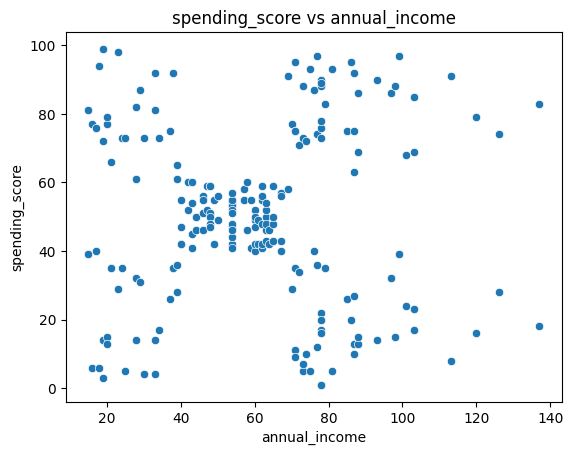

In [ ]:
sns.scatterplot(data=df,x='annual_income', y='spending_score')
plt.title('spending_score vs annual_income');

In [ ]:
num_cols= ['age', 'annual_income', 'spending_score']
cat_cols= ['gender']

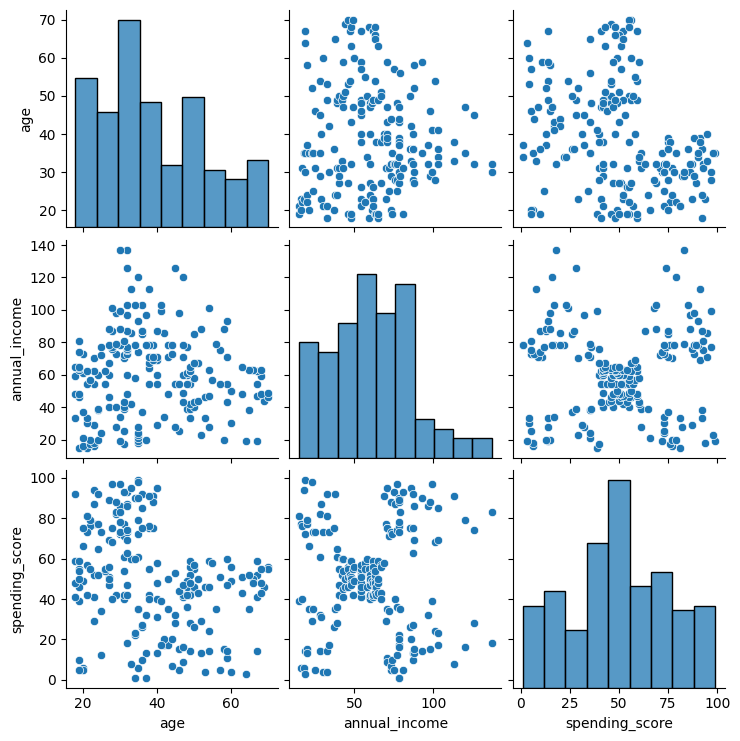

In [ ]:
sns.pairplot(df[num_cols]);

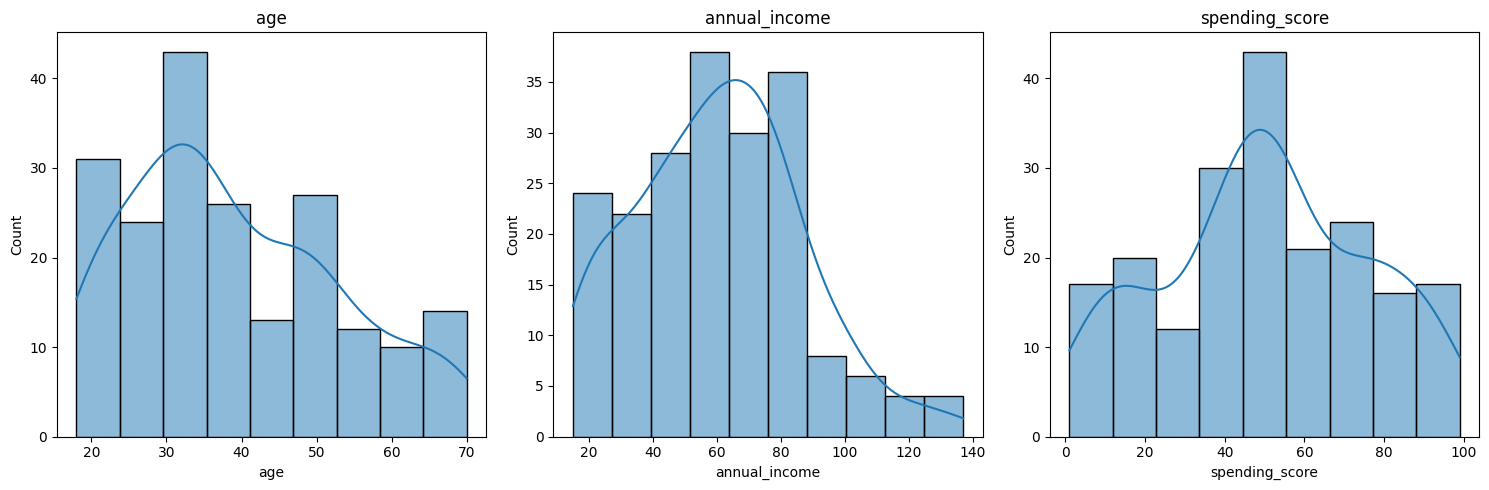

In [ ]:
# atur figure dan axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot histograms dgn KDE
for i, column in enumerate(['age', 'annual_income', 'spending_score']):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i])
    axes[i].set_title(column)

# Display plot
plt.tight_layout() # secara otomatis mengoptimalkan ruang di antara subplot agar tidak ada tumpang tindih
plt.show()

Hasil Pemangatan:
- rentang usia umur pelanggannya dari 20 sampai 70, terbanyak umur kisayan 30-35.
- frekuensi pelanggan yg memiliki pendapatan paling tinggi ada pada rentang?
- spending score paling tinggi ada pada rentang berapa?


In [ ]:
# Menghitung jumlah setiap kategori gender
gender_counts = df['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']
gender_counts

,gender,count
0,1,112
1,0,88


In [ ]:
# Membuat pie chart dengan Plotly Express
fig = go.Figure(data=[go.Pie(labels=['Female','Male'], values=gender_counts['count'])])

# Mengatur posisi title dan legend
fig.update_layout(title_text='Persentase Gender', title_x=0.5, title_y=0.95,
                  legend=dict(x=0.75, y=0.5))

fig.show()

<ipython-input-17-10881e11e9ba>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




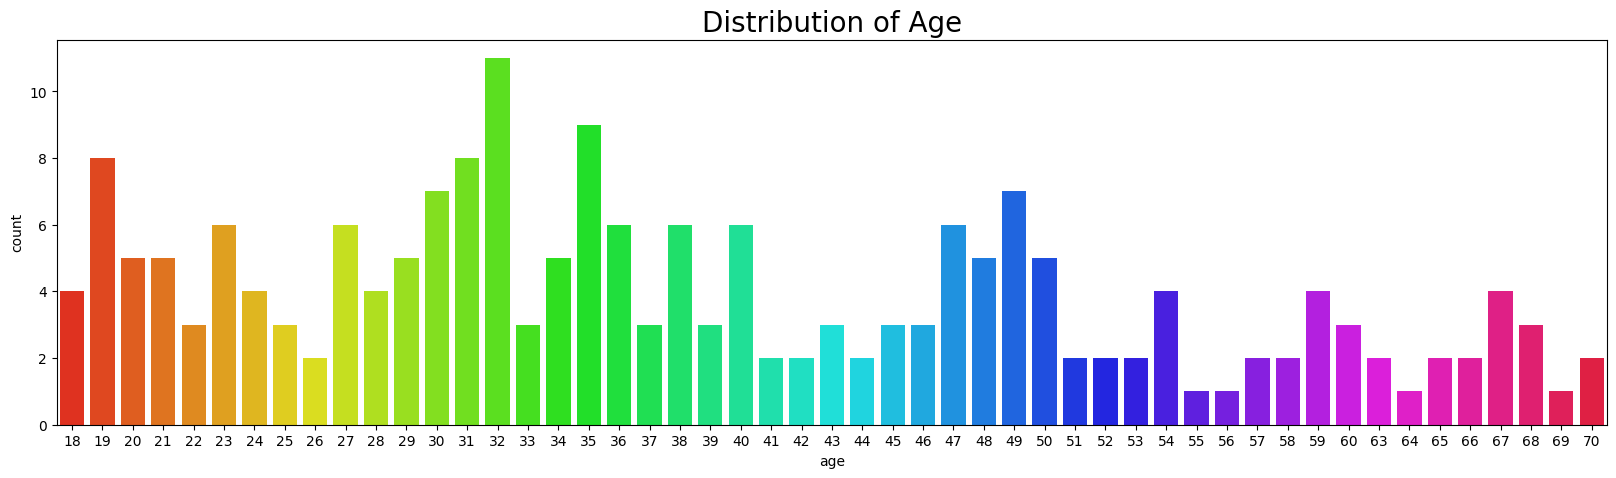

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x=df['age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

<ipython-input-18-441e2043b963>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




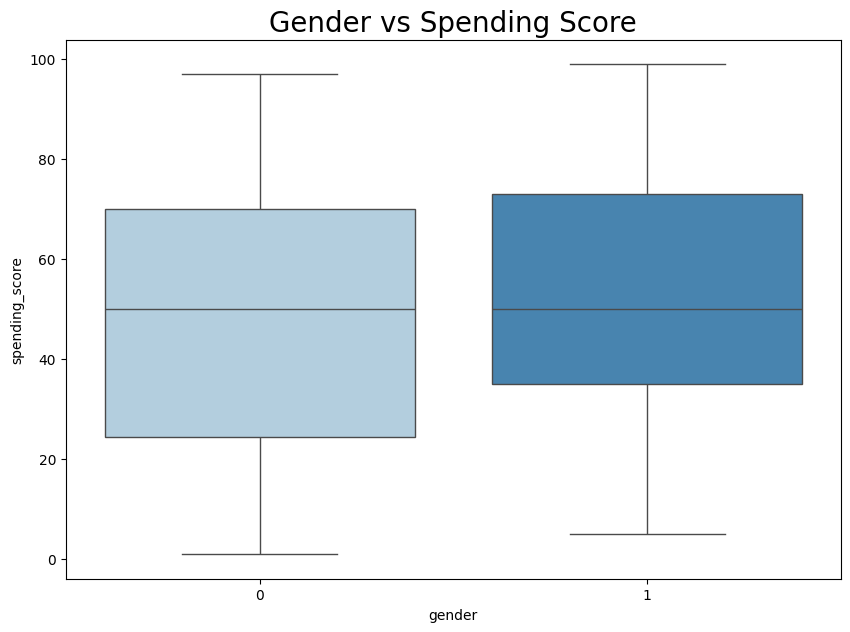

In [ ]:
#  Gender vs Spendscore
plt.figure(figsize=(10,7))
sns.boxplot(data=df, x= 'gender', y= 'spending_score', palette='Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

## Clustering tanpa PCA

In [ ]:
x = df.loc[:, ['spending_score', 'annual_income']]

print(x.shape)

(200, 2)


In [ ]:
x

,spending_score,annual_income
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17
...,...,...
195,79,120
196,28,126
197,74,126
198,18,137


**Elbow**

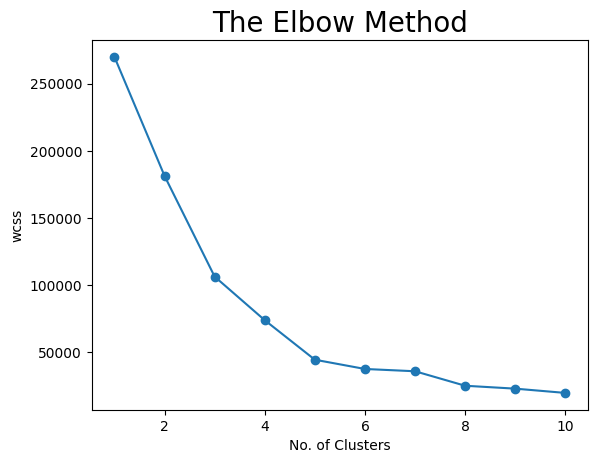

In [ ]:
wcss = []
#membuat iterasi dari 1-10 untuk nilai k terbaik
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 'auto', random_state = 3)
    km.fit(x)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

**Silhouette Score**

In [ ]:
from sklearn.metrics import silhouette_score

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
km.fit(x)

#calculate the score
score = silhouette_score(x, km.labels_, metric='euclidean')
print('Silhouette score: %.3f' % score)

Silhouette score: 0.554


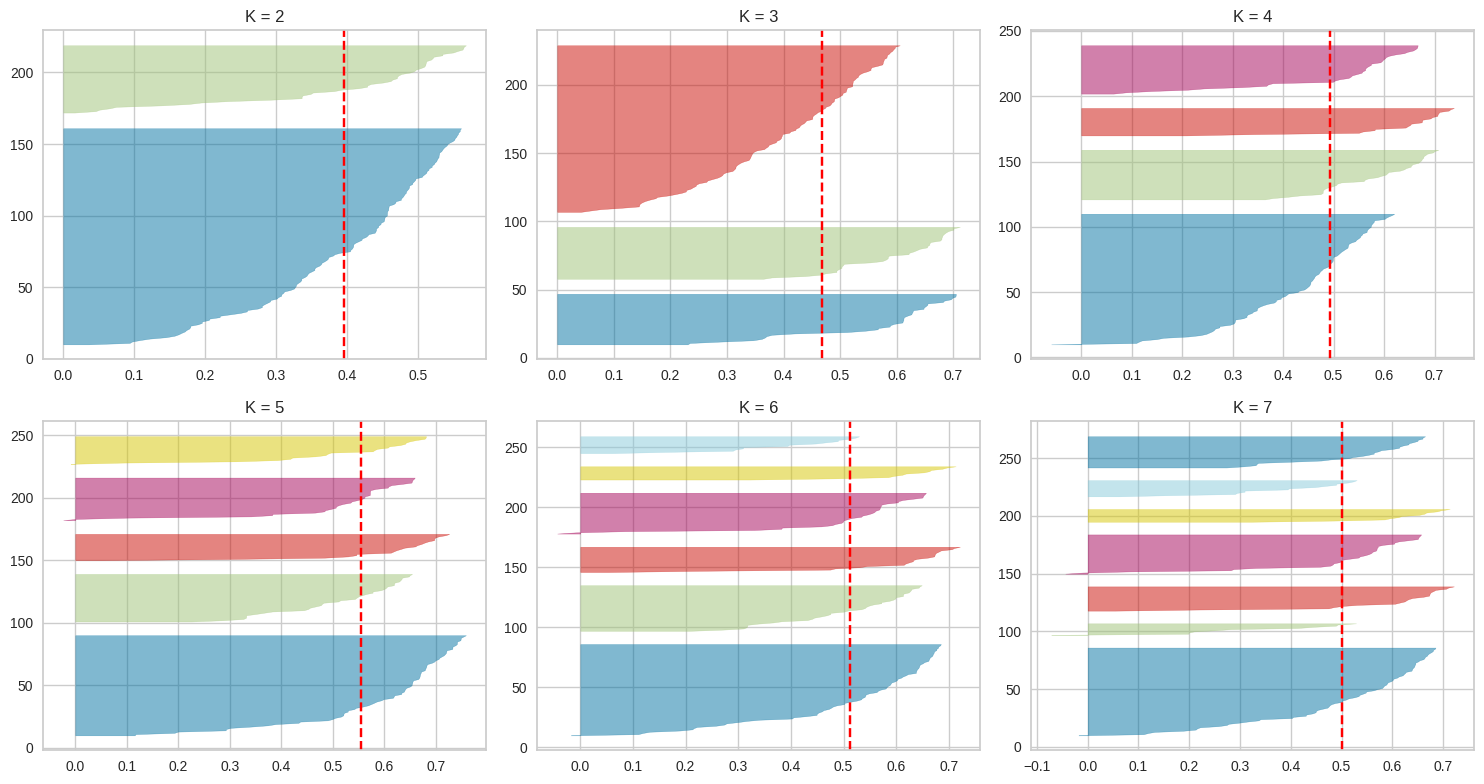

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Set up subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Loop melalui setiap subplot
for i, ax in enumerate(axes.flatten()):
    # Set jumlah cluster
    n_clusters = i + 2

    # Initialize K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++",
                    n_init = 'auto', max_iter = 100, random_state = 42)

    # Buat SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer ke data x
    visualizer.fit(x)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

Final K= 5

In [ ]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300,
            n_init = 'auto', random_state = 3)
y_pred = km.fit_predict(x)
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [ ]:
#gabungkan hasil clustering dengan dafarame x
x['cluster'] = list(y_pred)
x.head()

,spending_score,annual_income,cluster
0,39,15,4
1,81,15,3
2,6,16,4
3,77,16,3
4,40,17,4


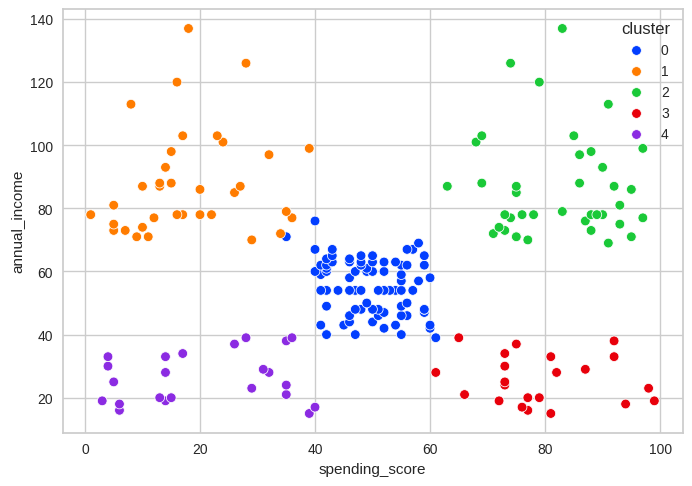

In [ ]:
sns.scatterplot(data=x, x="spending_score", y="annual_income", hue="cluster",palette="bright");

Analisis:

- Di **cluster 0** kita melihat bahwa orang-orang memiliki pendapatan rata-rata dan skor pengeluaran rata-rata, orang-orang ini lagi-lagi tidak akan menjadi target utama toko atau mal, tetapi sekali lagi mereka akan dipertimbangkan dan teknik analisis data lainnya dapat digunakan untuk meningkatkan skor pengeluaran mereka.
\

- Di **cluster 1** kami melihat bahwa orang-orang memiliki pendapatan tinggi dan nilai pengeluaran tinggi, ini adalah kasus yang ideal untuk mal atau toko karena orang-orang ini adalah sumber keuntungan utama. Orang-orang ini mungkin pelanggan tetap mal dan yakin dengan fasilitas mal.

- Di **cluster 2** kita dapat melihat orang-orang memiliki pendapatan tahunan yang rendah dan skor pengeluaran yang rendah, ini cukup masuk akal karena orang-orang yang memiliki gaji rendah lebih suka membeli lebih sedikit, sebenarnya, ini adalah orang-orang bijak yang tahu cara membelanjakan dan menghemat uang . Toko-toko/mal akan paling tidak tertarik pada orang-orang yang termasuk dalam cluster ini.

- Di **cluster 3** kita dapat melihat bahwa orang-orang berpenghasilan rendah tetapi memiliki skor pengeluaran yang lebih tinggi, mereka adalah orang-orang yang karena alasan tertentu lebih suka membeli produk meskipun berpenghasilan rendah. Mungkin karena orang-orang ini lebih dari puas dengan layanan mal. Toko/mall mungkin tidak menargetkan orang-orang ini secara efektif tetapi tetap tidak akan kehilangan mereka.


- Di **cluster 4**  kita lihat masyarakat berpenghasilan tinggi tapi pengeluarannya rendah, ini menarik. Mungkin ini orang-orang yang tidak puas atau tidak senang dengan pelayanan mall. Ini bisa menjadi target utama mal, karena berpotensi menghabiskan uang. Oleh karena itu, pihak pengelola mal akan berusaha menambah fasilitas baru agar dapat menarik minat masyarakat tersebut dan dapat memenuhi kebutuhannya.



## Clustering dengan PCA

In [ ]:
#misalkan kita menggunakan kolom age, annual_income dan spedning_score untuk pembuatan clustering
df_new = df.iloc[:,2:]
df_new

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [ ]:
# scaling fiturnya
df_new_scale = StandardScaler().fit_transform(df_new)

In [ ]:
# Cek Variance dengan PCA
%%time
pca = PCA()
pca.fit(df_new_scale)

CPU times: user 2.44 ms, sys: 48 µs, total: 2.49 ms
Wall time: 24.3 ms


PCA()

In [ ]:
# cek jumlah komponen jika kita ingin menyimpan 70% informasi

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_com = np.argmax(cumsum >= 0.7) + 1
num_com

2

In [ ]:
#gunakan n_components=2
pca= PCA(n_components=2)

reduced_data= pca.fit_transform(df_new_scale)

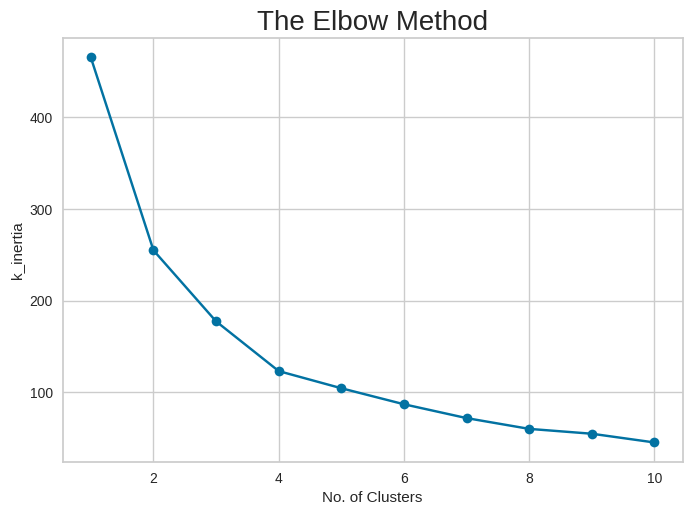

In [ ]:
k_inertia = []
#membuat iterasi dari 1-10 untuk nilai k terbaik
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 'auto', random_state = 3)
    km.fit(reduced_data)
    k_inertia.append(km.inertia_)

plt.plot(range(1, 11), k_inertia, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('k_inertia')
plt.show()

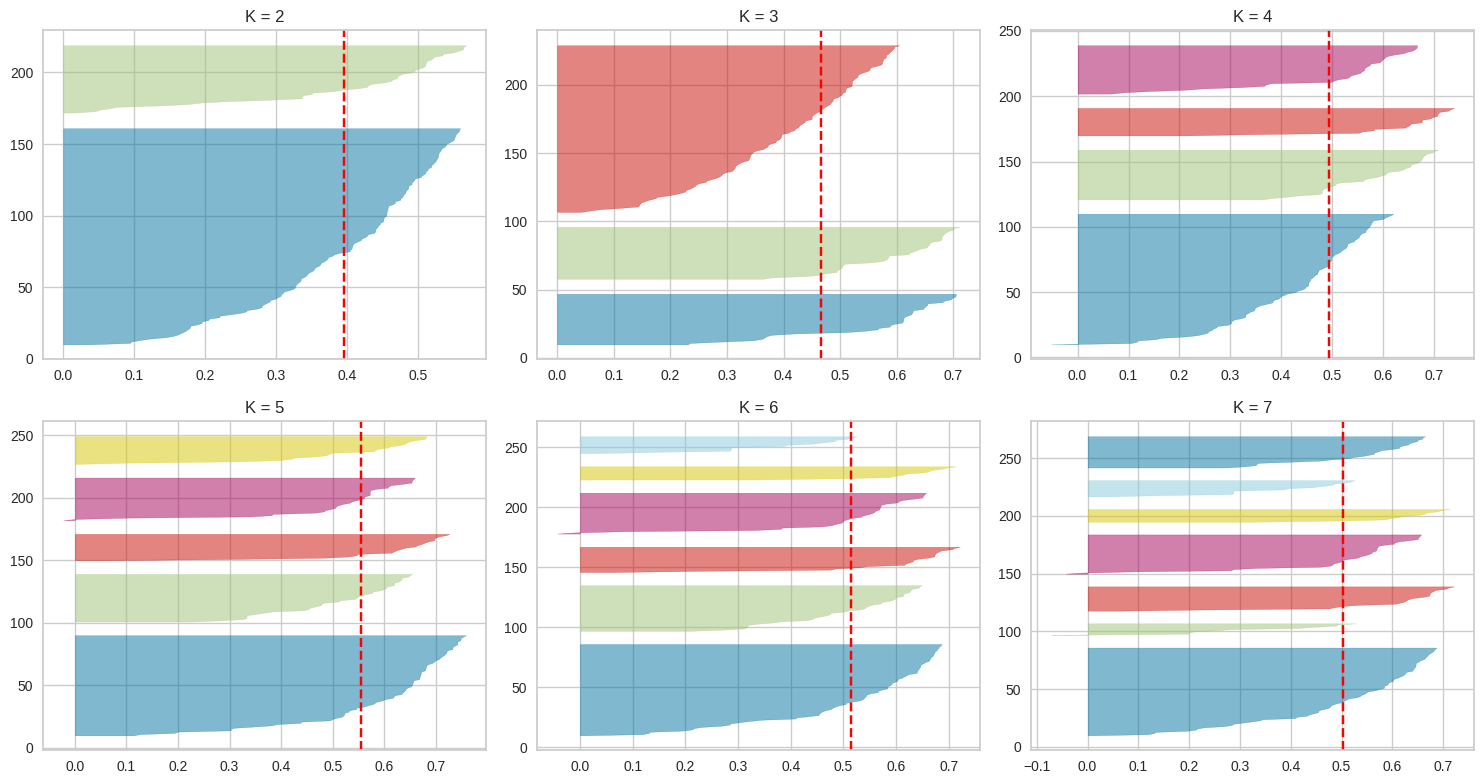

In [ ]:
# Set up subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Loop melalui setiap subplot
for i, ax in enumerate(axes.flatten()):
    # Set jumlah cluster
    n_clusters = i + 2

    # Initialize K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++",
                    n_init = 'auto', max_iter = 100, random_state = 42)

    # Buat SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer ke data x
    visualizer.fit(x)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

sepertinya jumlah cluster yang terbaik adalah 5 cluster.

In [ ]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 'auto', random_state = 3)
km.fit(reduced_data)

KMeans(n_clusters=5, n_init='auto', random_state=3)

In [ ]:
clusters= km.predict(reduced_data)
clusters

array([3, 3, 4, 3, 3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 3,
       4, 4, 3, 1, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 1, 4, 4, 1, 4, 4, 1,
       1, 4, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 4, 0, 1, 4, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       2, 2], dtype=int32)

In [ ]:
reduced_data= pd.DataFrame(reduced_data, columns= ['PC1','PC2'])
reduced_data.head()

,PC1,PC2
0,-0.615720,-1.763481
1,-1.665793,-1.820747
2,0.337862,-1.674799
3,-1.456573,-1.772430
4,-0.038465,-1.662740


In [ ]:
reduced_data['clusters']= clusters
reduced_data.head()

,PC1,PC2,clusters
0,-0.615720,-1.763481,3
1,-1.665793,-1.820747,3
2,0.337862,-1.674799,4
3,-1.456573,-1.772430,3
4,-0.038465,-1.662740,3


In [ ]:
pca_df_cluster = pd.concat([df_new, reduced_data], axis=1)
pca_df_cluster.head()

,age,annual_income,spending_score,PC1,PC2,clusters
0,19,15,39,-0.615720,-1.763481,3
1,21,15,81,-1.665793,-1.820747,3
2,20,16,6,0.337862,-1.674799,4
3,23,16,77,-1.456573,-1.772430,3
4,31,17,40,-0.038465,-1.662740,3


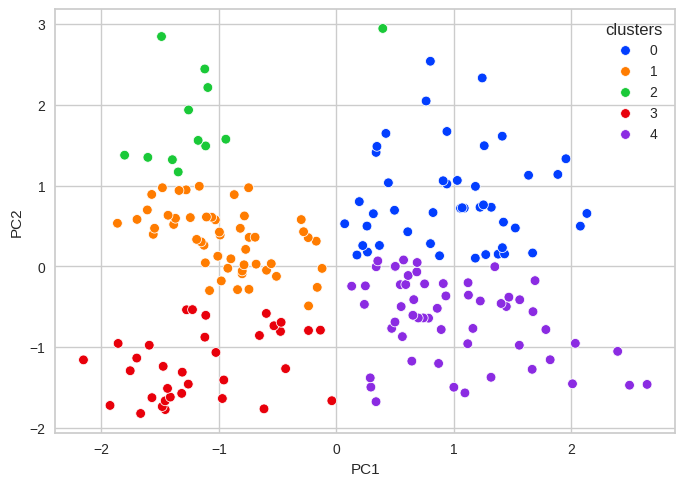

In [ ]:
sns.scatterplot(data=pca_df_cluster, x="PC1", y="PC2", hue="clusters",palette="bright");

In [ ]:
label_df= pca_df_cluster['clusters'].unique()
label_df

array([3, 4, 1, 0, 2], dtype=int32)

In [ ]:
for cluster_label in range(0, 5):
    cluster_data = pca_df_cluster.query(f'clusters == {cluster_label}')
    spending_score_mean = cluster_data['spending_score'].mean().round(2)
    print(f"Rata-rata spending score pada cluster {cluster_label}: {spending_score_mean}")

Rata-rata spending score pada cluster 0: 25.41
Rata-rata spending score pada cluster 1: 66.54
Rata-rata spending score pada cluster 2: 77.33
Rata-rata spending score pada cluster 3: 69.26
Rata-rata spending score pada cluster 4: 38.0


## Menggunakan Pipeline

In [ ]:
df_new.head()

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
from sklearn.pipeline import Pipeline
import joblib

# Buat pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Scaling
    ('pca', PCA(n_components=2)),       # PCA dengan 2 komponen
])

# Fit pipeline ke data
pipeline.fit(df_new)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2))])

In [ ]:
# Transform data
pca_result = pipeline.transform(df_new)
reduced_data= pd.DataFrame(reduced_data, columns= ['PC1','PC2'])
reduced_data.head()

,PC1,PC2
0,-0.615720,-1.763481
1,-1.665793,-1.820747
2,0.337862,-1.674799
3,-1.456573,-1.772430
4,-0.038465,-1.662740


In [ ]:
#prediksi dengan model K-Means
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 'auto', random_state = 3)
km.fit(reduced_data)

clusters= km.predict(reduced_data)
reduced_data['clusters']= clusters
reduced_data.head()

,PC1,PC2,clusters
0,-0.615720,-1.763481,3
1,-1.665793,-1.820747,3
2,0.337862,-1.674799,4
3,-1.456573,-1.772430,3
4,-0.038465,-1.662740,3


In [ ]:
pca_df_cluster = pd.concat([df_new, reduced_data], axis=1)
pca_df_cluster.head()

,age,annual_income,spending_score,PC1,PC2,clusters
0,19,15,39,-0.615720,-1.763481,3
1,21,15,81,-1.665793,-1.820747,3
2,20,16,6,0.337862,-1.674799,4
3,23,16,77,-1.456573,-1.772430,3
4,31,17,40,-0.038465,-1.662740,3


In [ ]:
# save pipeline
joblib.dump(pipeline, 'pipeline.pkl')
#save model
joblib.dump(km, 'model.pkl')

['model.pkl']

In [ ]:
num_cols

['age', 'annual_income', 'spending_score']

In [ ]:
#save list nama kolom
joblib.dump(num_cols, 'num_cols.pkl')

['num_cols.pkl']

# Inference

In [ ]:
#load pipeline
pipeline = joblib.load('pipeline.pkl')
#load model
model = joblib.load('model.pkl')
#load list nama kolom
num_cols = joblib.load('num_cols.pkl')

In [ ]:
df_dict = df.sample(5).to_dict(orient='list')
df_dict

{'customerid': [186, 174, 49, 34, 7],
 'gender': [0, 0, 1, 0, 1],
 'age': [30, 36, 29, 18, 35],
 'annual_income': [99, 87, 40, 33, 18],
 'spending_score': [97, 92, 42, 92, 6]}

In [ ]:

data= {'customerid': [100, 160, 100, 64, 138],
 'gender': [0, 1, 0, 1, 0],
 'age': [18, 39, 20, 54, 32],
 'annual_income': [60, 85, 60, 47, 73],
 'spending_score': [42, 13, 47, 59, 73]}

df_inf = pd.DataFrame(data)

In [ ]:
df_inf_prep= pipeline.transform(df_inf[num_cols])
df_inf_prep

array([[-0.83114919, -0.05442603],
       [ 0.98267099,  0.98664857],
       [-0.86683857, -0.05743218],
       [ 0.55162244, -0.49710634],
       [-0.99514141,  0.42601962]])

In [ ]:
df_inf_prep= pd.DataFrame(df_inf_prep, columns= ['PC1','PC2'])
df_inf_prep.head()

,PC1,PC2
0,-0.831149,-0.054426
1,0.982671,0.986649
2,-0.866839,-0.057432
3,0.551622,-0.497106
4,-0.995141,0.426020


In [ ]:
df_inf_prep['clusters']= model.predict(df_inf_prep)
df_inf_prep

,PC1,PC2,clusters
0,-0.831149,-0.054426,1
1,0.982671,0.986649,0
2,-0.866839,-0.057432,1
3,0.551622,-0.497106,4
4,-0.995141,0.426020,1


In [ ]:
#concat dengan df_inf
df_inf_cluster= pd.concat([df_inf, df_inf_prep], axis=1)
df_inf_cluster

,customerid,gender,age,annual_income,spending_score,PC1,PC2,clusters
0,100,0,18,60,42,-0.831149,-0.054426,1
1,160,1,39,85,13,0.982671,0.986649,0
2,100,0,20,60,47,-0.866839,-0.057432,1
3,64,1,54,47,59,0.551622,-0.497106,4
4,138,0,32,73,73,-0.995141,0.426020,1
